In [38]:
%reload_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt

from model import CascadeNetwork
from visualization_functions import plot_network

In [39]:
def fraction_failed(model):
    """Return the fraction of the failed nodes for the given `model`"""
    states = [node.failed for node in model.schedule.agents]
    N = model.num_nodes
    return sum(states) / N

### Model setup

In [81]:
adj_matrix = np.matrix([[0, 0, 1, 0, 0, 0, 0, 0, 0],
                        [0, 0, 1, 0, 0, 0, 0, 0, 0],
                        [1, 1, 0, 1, 0, 0, 0, 0, 0],
                        [0, 0, 1, 0, 1, 0, 0, 0, 0],
                        [0, 0, 0, 1, 0, 1, 1, 1, 1],
                        [0, 0, 0, 0, 1, 0, 0, 0, 0],
                        [0, 0, 0, 0, 1, 0, 0, 0, 0],
                        [0, 0, 0, 0, 1, 0, 0, 0, 0],
                        [0, 0, 0, 0, 1, 0, 0, 0, 0]])

load_vector = [1, 1, 1, 1, 1, 1, 1, 1, 1]
capacity_vector = [1.7, 1.7, 1.3, 1.3, 1.5, 1.55, 1.55, 1.55, 1.55]

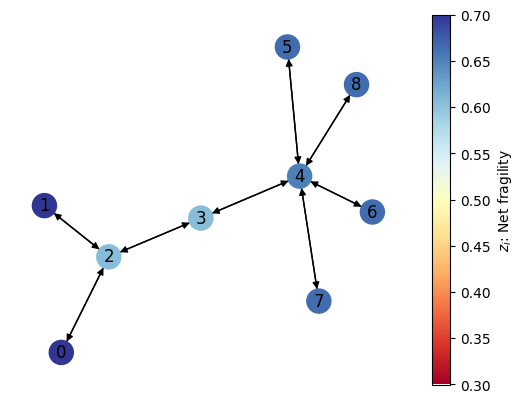

Load shock for node 2


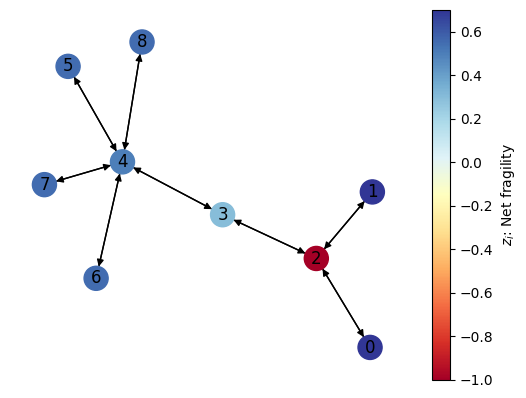

Step 0:
Node 0 (Capacity = 1.7): Load 1.00, non-failed
Node 1 (Capacity = 1.7): Load 1.00, non-failed
Node 2 (Capacity = 1.3): Load 5.30, failing
Node 3 (Capacity = 1.3): Load 1.00, non-failed
Node 4 (Capacity = 1.5): Load 1.00, non-failed
Node 5 (Capacity = 1.55): Load 1.00, non-failed
Node 6 (Capacity = 1.55): Load 1.00, non-failed
Node 7 (Capacity = 1.55): Load 1.00, non-failed
Node 8 (Capacity = 1.55): Load 1.00, non-failed
------------------------------------------------------------


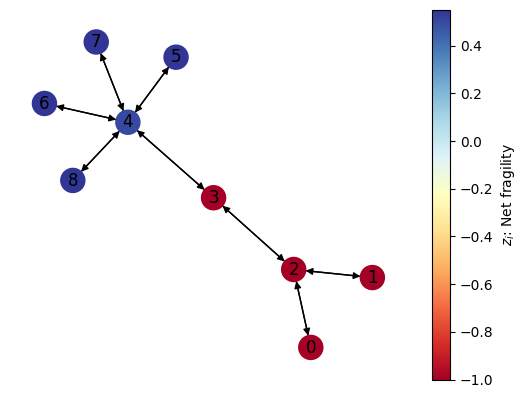

Step 1:
Node 0 (Capacity = 1.7): Load 2.33, failing
Node 1 (Capacity = 1.7): Load 2.33, failing
Node 2 (Capacity = 1.3): Load 1.30, failed
Node 3 (Capacity = 1.3): Load 2.33, failing
Node 4 (Capacity = 1.5): Load 1.00, non-failed
Node 5 (Capacity = 1.55): Load 1.00, non-failed
Node 6 (Capacity = 1.55): Load 1.00, non-failed
Node 7 (Capacity = 1.55): Load 1.00, non-failed
Node 8 (Capacity = 1.55): Load 1.00, non-failed
------------------------------------------------------------


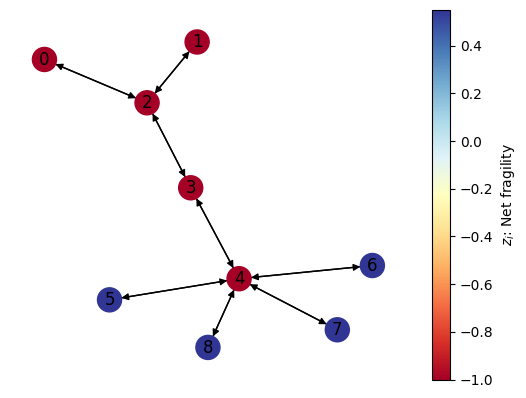

Step 2:
Node 0 (Capacity = 1.7): Load 1.70, failed
Node 1 (Capacity = 1.7): Load 1.70, failed
Node 2 (Capacity = 1.3): Load 1.30, failed
Node 3 (Capacity = 1.3): Load 1.30, failed
Node 4 (Capacity = 1.5): Load 4.15, failing
Node 5 (Capacity = 1.55): Load 1.00, non-failed
Node 6 (Capacity = 1.55): Load 1.00, non-failed
Node 7 (Capacity = 1.55): Load 1.00, non-failed
Node 8 (Capacity = 1.55): Load 1.00, non-failed
------------------------------------------------------------


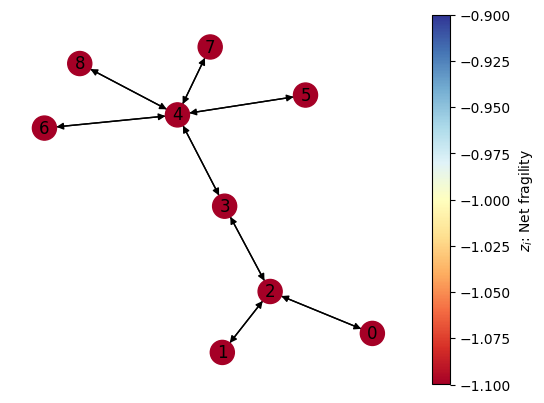

Step 3:
Node 0 (Capacity = 1.7): Load 1.70, failed
Node 1 (Capacity = 1.7): Load 1.70, failed
Node 2 (Capacity = 1.3): Load 1.30, failed
Node 3 (Capacity = 1.3): Load 1.30, failed
Node 4 (Capacity = 1.5): Load 1.50, failed
Node 5 (Capacity = 1.55): Load 1.56, failing
Node 6 (Capacity = 1.55): Load 1.56, failing
Node 7 (Capacity = 1.55): Load 1.56, failing
Node 8 (Capacity = 1.55): Load 1.56, failing
------------------------------------------------------------


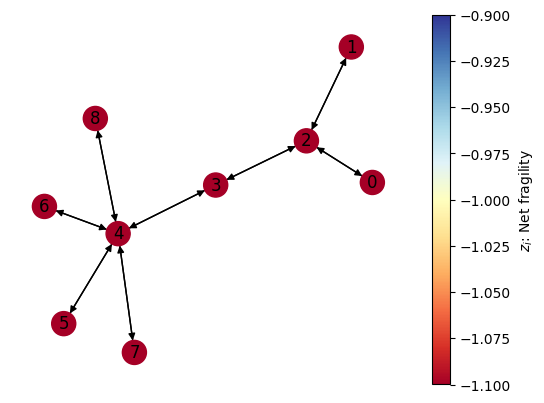

X =  1.0


In [82]:
overload_model = CascadeNetwork(adj_matrix, load_vector, capacity_vector, model_type="overload", load_type="llsc", test=True)
plot_network(overload_model)
(print("Load shock for node 2"))
overload_model.set_load(2, 5.3)
plot_network(overload_model)

num_steps = 4

for _ in range(num_steps):
    overload_model.step()
    plot_network(overload_model)

print("X = ", fraction_failed(overload_model))

## Ideas for exploration

- Tweak some edges between a node that fails the ones that don't
- Explore critical load that leads to total collapse
  - Loop over load shocks until one that leads to total failure
  - Loop over nodes that gets the initial load shock

# Critical loads

In [70]:
# Default values
max_steps = 10
global_frac = 0
load = 4
step_size = 0.01
init_load=max(capacity_vector)+0.1
init_node = 2

def find_critical_load(adj_matrix=adj_matrix,capacity_vector=capacity_vector,init_load=init_load,init_node=init_node, step_size=step_size, max_steps=max_steps):
    load = init_load
    load_vector = [1,1,1,1,1,1,1,1,1]
    load_vector[init_node] = load
    global_frac = 0
    # Plot to check correct initialization
    # plot_network(CascadeNetwork(adj_matrix, load_vector, capacity_vector, model_type="overload", load_type="llsc", test=False))
    while global_frac != 1:
        critical_load_network = CascadeNetwork(adj_matrix, load_vector, capacity_vector, model_type="overload", load_type="llsc", test=False)
        for _ in range(max_steps):
            critical_load_network.step()
        global_frac = fraction_failed(critical_load_network)
        load+=step_size
        load_vector[init_node] = load
    return load-step_size, critical_load_network

In [52]:
critical_load, failed_network = find_critical_load(step_size=0.001)
print("Critical load:",critical_load)

Critical load: 5.700000000000292


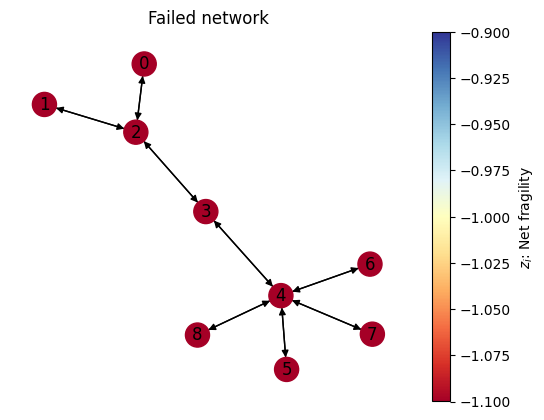

In [53]:
plot_network(failed_network, title="Failed network")

In [71]:
critical_loads_all_init_nodes = []
num_nodes = adj_matrix.shape[0]
for node_id in range(num_nodes):
    critical_load, _ = find_critical_load(init_node=node_id,step_size=0.001)
    critical_loads_all_init_nodes.append(critical_load)
print(critical_loads_all_init_nodes)

[5.700000000000325, 5.700000000000325, 5.700000000000325, 5.700000000000325, 5.700000000000325, 5.700000000000325, 5.700000000000325, 5.700000000000325, 5.700000000000325]


# Result

The critical load is the same for any initial load. I.e. the result of a systemic collapse is dependent on the magnitude of the load and notat all on which node that experiences the initial shock. At least for the given network configuration. 

**Next: Test if this result holds for other network configurations.**

## Interpretation - Financial markets

As the overload distribution model replicates a financial market, this can imply that given a network (subgraph), the whole network can collapse if a shock is large enough, for any initial shock. So a bank that experiences a bank run, that is a bank too illiquid to meet deposit withdrawal demands, can affect the entire network, and it does not depend on how well-connected it is with the rest of the market, only if it is a part of the subgraph at all.

# Verify for other network configurations

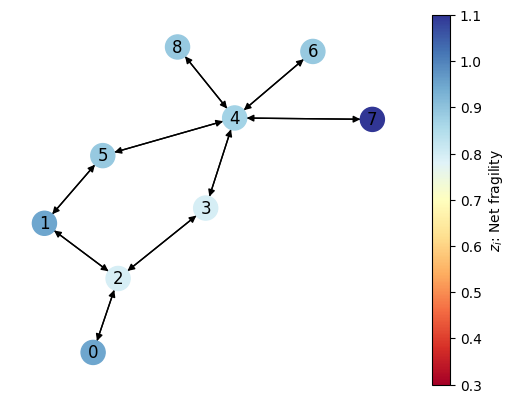

Load shock for node 2


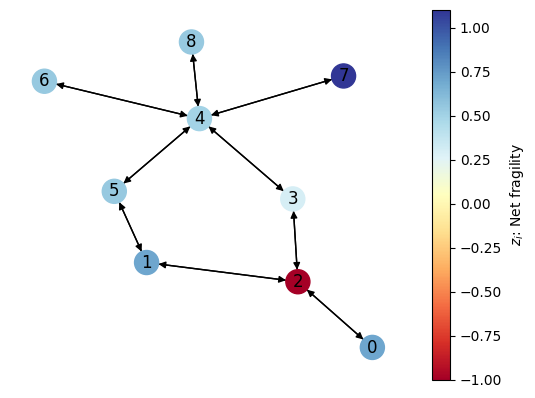

In [74]:
adj_matrix_ver = np.matrix([[0, 0, 1, 0, 0, 0, 0, 0, 0],
                        [0, 0, 1, 0, 0, 5, 0, 0, 0],
                        [1, 1, 0, 1, 0, 0, 0, 0, 0],
                        [0, 0, 1, 0, 1, 0, 0, 0, 0],
                        [0, 0, 0, 1, 0, 1, 1, 1, 1],
                        [0, 1, 0, 0, 1, 0, 0, 0, 0],
                        [0, 0, 0, 0, 1, 0, 0, 0, 0],
                        [0, 0, 0, 0, 1, 0, 0, 0, 0],
                        [0, 0, 0, 0, 1, 0, 0, 0, 0]])

load_vector_ver = [1, 1, 1, 1, 1, 1, 1, 1, 1]
capacity_vector_ver = [1.7, 1.7, 1.3, 1.3, 1.5, 1.55, 1.55, 2.1, 1.55]

overload_model_ver = CascadeNetwork(adj_matrix_ver, load_vector_ver, capacity_vector_ver, model_type="overload", load_type="llsc", test=False)
plot_network(overload_model_ver)
(print("Load shock for node 2"))
overload_model_ver.set_load(2, 5.3)
plot_network(overload_model_ver)

In [75]:
critical_loads_all_init_nodes_ver = []
num_nodes_ver = adj_matrix_ver.shape[0]
for node_id in range(num_nodes_ver):
    critical_load, _ = find_critical_load(adj_matrix_ver,capacity_vector_ver,init_load=2.2,init_node=node_id,step_size=0.01)
    critical_loads_all_init_nodes_ver.append(critical_load)
print(critical_loads_all_init_nodes_ver)

[6.259999999999914, 6.259999999999914, 6.259999999999914, 6.259999999999914, 6.259999999999914, 6.259999999999914, 6.259999999999914, 6.259999999999914, 6.259999999999914]


Result holds for another network

## Check if capacity vector is decisive for critical load

In [79]:
critical_loads_all_init_nodes_ver_2 = []
num_nodes_ver = adj_matrix_ver.shape[0]
capacity_vector_ver_2 = [2.9, 1.7, 1.3, 1.3, 1.5, 2.1, 1.55, 2.1, 1.55] # Same as above but node 5 has now same high capacity
for node_id in range(num_nodes_ver):
    critical_load, _ = find_critical_load(adj_matrix_ver,capacity_vector_ver_2,init_load=max(capacity_vector_ver_2)+0.1,init_node=node_id,step_size=0.01)
    critical_loads_all_init_nodes_ver_2.append(critical_load)
print(critical_loads_all_init_nodes_ver_2)

[8.009999999999893, 8.009999999999893, 8.009999999999893, 8.009999999999893, 8.009999999999893, 8.009999999999893, 8.009999999999893, 8.009999999999893, 8.009999999999893]


Looks like the greater the total capacities, the higher the critical load. Check if for same total capacity, a spread of capacities from the most solid to the least solid helps on the critical load